In [86]:
import pandas as pd
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from bs4 import BeautifulSoup as bs
import requests
import pymongo

import datetime

In [87]:
# Set the executable path and initialize the chrome browser in splinter
executable_path = {'executable_path': 'C:\ChromeSafe\chromedriver.exe'}
browser = Browser('chrome', **executable_path)

In [88]:
#NASA Mars News scraping to save latest News Title and Paragraph Text. 
#Assign text to variables "news_title" and "news_p" for reference later.

In [89]:
url = "https://mars.nasa.gov/news/"

In [90]:
browser.visit(url)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_310v0" type="text/javascript"></script><script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_duve0" type="text/javascript"></script><script src=
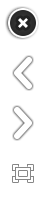
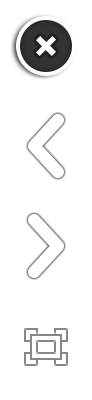
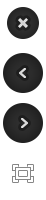
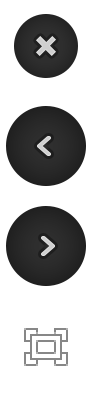
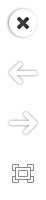
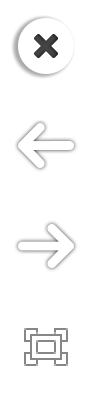
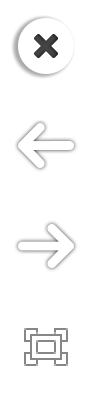
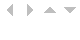

In [91]:
html_1=browser.html
soup_1=bs(html_1, 'html.parser')
# print(html_1)
print(soup_1.prettify)

In [92]:
news_article_t=soup_1.select_one("ul.item_list")
print(news_article_t.prettify)

<bound method Tag.prettify of <ul class="item_list "><li class="slide"><div class="image_and_description_container"><a href="/news/8436/why-this-martian-full-moon-looks-like-candy/" target="_self"><div class="rollover_description"><div class="rollover_description_inner">For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera.</div><div class="overlay_arrow"><img alt="More" src="/assets/overlay-arrow.png"/></div></div><div class="list_image"><img alt="Three views of the Martian moon Phobos were taken by NASA's 2001 Mars Odyssey orbiter." src="/system/news_items/list_view_images/8436_PIA23205_annotated-32x24.jpg"/></div><div class="bottom_gradient"><div><h3>Why This Martian Full Moon Looks Like Candy</h3></div></div></a><div class="list_text"><div class="list_date">May  9, 2019</div><div class="content_title"><a href="/news/8436/why-this-m

In [93]:
news_article_tslide= soup_article_t.select_one("li.slide")
print(news_article_tslide.prettify)

<bound method Tag.prettify of <li class="slide"><div class="image_and_description_container"><a href="/news/8436/why-this-martian-full-moon-looks-like-candy/" target="_self"><div class="rollover_description"><div class="rollover_description_inner">For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera.</div><div class="overlay_arrow"><img alt="More" src="/assets/overlay-arrow.png"/></div></div><div class="list_image"><img alt="Three views of the Martian moon Phobos were taken by NASA's 2001 Mars Odyssey orbiter." src="/system/news_items/list_view_images/8436_PIA23205_annotated-32x24.jpg"/></div><div class="bottom_gradient"><div><h3>Why This Martian Full Moon Looks Like Candy</h3></div></div></a><div class="list_text"><div class="list_date">May  9, 2019</div><div class="content_title"><a href="/news/8436/why-this-martian-full-moon-looks-

In [94]:
news_article = soup_1.select_one('ul.item_list li.slide') 
print(news_article.prettify())

<li class="slide">
 <div class="image_and_description_container">
  <a href="/news/8436/why-this-martian-full-moon-looks-like-candy/" target="_self">
   <div class="rollover_description">
    <div class="rollover_description_inner">
     For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera.
    </div>
    <div class="overlay_arrow">
     <img alt="More" src="/assets/overlay-arrow.png"/>
    </div>
   </div>
   <div class="list_image">
    <img alt="Three views of the Martian moon Phobos were taken by NASA's 2001 Mars Odyssey orbiter." src="/system/news_items/list_view_images/8436_PIA23205_annotated-32x24.jpg"/>
   </div>
   <div class="bottom_gradient">
    <div>
     <h3>
      Why This Martian Full Moon Looks Like Candy
     </h3>
    </div>
   </div>
  </a>
  <div class="list_text">
   <div class="list_date">
    May  9, 2019
   </

In [95]:
news_article.find('div', class_='content_title')

<div class="content_title"><a href="/news/8436/why-this-martian-full-moon-looks-like-candy/" target="_self">Why This Martian Full Moon Looks Like Candy</a></div>

In [96]:
news_article.find('div', class_='content_title').get_text()

'Why This Martian Full Moon Looks Like Candy'

In [97]:
news_title = soup_article.find("div", class_='content_title').get_text()
print(news_title)

Why This Martian Full Moon Looks Like Candy


In [98]:
news_article.find('div', class_='article_teaser_body').get_text()

"For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera."

In [99]:
news_p = news_article.find('div', class_='article_teaser_body').get_text()
print(news_p)

For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera.


In [100]:
#Visit JPL url to scrape feature image url
#Save full size image to variable called "feature_image_url"

In [118]:
url_2= "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"

In [119]:
browser.visit(url_2)

In [120]:
html_2=browser.html
soup_2=bs(html_2, 'html.parser')

In [121]:
image_small_link=browser.find_link_by_partial_text('FULL IMAGE')
image_small_link.click()

In [122]:
image_large_link=browser.find_link_by_partial_text('more info')
image_large_link.click()

In [126]:
full_image = soup_2.find('figure', class_='lede')['src']
print(full_image)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
browser.visit(feat_image_url)

In [ ]:
html_2b=browser.html
soup_2b=bs(html_2b ,"html.parser")

In [40]:
feature_image= soup_2b.find('figure', class_='lede').a['href']
#full_image= soup_2.select('figure a')
#full_image= soup_2.find('img', class_='main_image')
# featured_image_url='https://www.jpl.nasa.gov'+ full_image
print(feature_image)

<div class="grid_layout">
<div class="directory">
<form action="/search.php" class="overlay_search top_search">
<input class="search_field" name="q" onblur="this.placeholder = 'search'" onfocus="this.placeholder = ''" placeholder="search" type="text" value=""/>
<input class="search_submit" type="submit" value=""/>
</form>
<div class="nav_item">
<div class="arrow_box">
<span class="arrow_down"></span>
</div>
<h3 class="nav_title">
<a href="/about">about JPL</a>
</h3>
<ul class="subnav">
<li>
<a href="/about">about JPL</a>
</li>
<li>
<a href="/about/exec.php">executive council</a>
</li>
<li>
<a href="/about/history.php">history</a>
</li>
<li>
<a href="/about/reports.php">annual reports</a>
</li>
<li>
<a href="/contact_JPL.php">contact us</a>
</li>
<li>
<a href="/opportunities/">opportunities</a>
</li>
</ul>
</div>
<div class="gradient_line"></div>
<div class="nav_item">
<div class="arrow_box">
<span class="arrow_down"></span>
</div>
<h3 class="nav_title">
<a href="/events">public events<

In [229]:
# full_image_href= full_image.find('src')
# print(full_image_href)

In [230]:
#feature_image_url = browser.visit('https://www.jpl.nasa.gov' + full_image)

In [231]:
#Visit Mars Weather twitter account and scrape latest weather tweet
#Save weather report tweet text  as variable called "mars_weather"

In [232]:
url_3='https://twitter.com/marswxreport?lang=en'

In [233]:
browser.visit(url_3)

In [234]:
html_3=browser.html
soup_3=bs(html_3, 'html.parser')
print(soup_3.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"00b92e66007ffd82.de440835aac50981\u003c:000e1a6f009bd48e","server_request_start_time":1557702288319,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20190501.1758.19e12a3","ttft_browser":"chrome"};!function(){fu

In [235]:
mars_weather=soup_3.find('p', class_='TweetTextSize TweetTextSize--normal js-tweet-text tweet-text').text
print(mars_weather)

InSight sol 162 (2019-05-12) low -100.2ºC (-148.3ºF) high -20.3ºC (-4.5ºF)
winds from the SW at 4.5 m/s (10.1 mph) gusting to 14.3 m/s (32.0 mph)
pressure at 7.50 hPapic.twitter.com/23uEPf5baF


In [236]:
#Visit Mars Facts webpage and use Pandas to scrape table with planet facts
#Convert data to a html table string 

In [243]:
url_4='https://space-facts.com/mars/'

In [244]:
browser.visit(url_4)

In [245]:
html_4=browser.html
soup_4=bs(html_4, 'html.parser')
print(soup_4.prettify())

<!DOCTYPE html>
<html class="csstransforms csstransforms3d csstransitions" lang="en-US" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script async="" src="https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_US.BW4NrCun1rw.O/m=plusone/rt=j/sv=1/d=1/ed=1/am=wQE/rs=AGLTcCO_Nud4aUV_1gfzBmUi0OLzCy3b5w/cb=gapi.loaded_0">
  </script>
  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_GB/sdk.js?hash=dc7e4e8532995f55d8015e7eb49806f4&amp;ua=modern_es6">
  </script>
  <meta content="153d19f04460b5eb7b1ed2d38890ad1e" name="maValidation"/>
  <meta charset="utf-8"/>
  <link href="https://space-facts.com/feed/" rel="alternate" title="Space Facts RSS Feed" type="application/rss+xml"/>
  <!-- wp_header -->
  <!-- This site is optimized with the Yoast SEO plugin v10.0 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   Mars Facts - Interesting Facts about Planet Mars
  </title>
  <meta content="Scientific, historic and cultur

In [246]:
mars_facts_table = pd.read_html(url_4)
mars_facts_table

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.52 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                  -153 to 20 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [247]:
type(mars_facts_table)

list

In [248]:
mars_facts_table_df = mars_facts_table[0]
mars_facts_table_df.columns = ['Description', 'Values']
mars_facts_table_df

Description                         Values
0  Equatorial Diameter:                       6,792 km
1       Polar Diameter:                       6,752 km
2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
3                Moons:            2 (Phobos & Deimos)
4       Orbit Distance:       227,943,824 km (1.52 AU)
5         Orbit Period:           687 days (1.9 years)
6  Surface Temperature:                  -153 to 20 °C
7         First Record:              2nd millennium BC
8          Recorded By:           Egyptian astronomers

In [249]:
mars_facts_table_df.set_index('Description', inplace=True)
mars_facts_table_df

Values
Description                                        
Equatorial Diameter:                       6,792 km
Polar Diameter:                            6,752 km
Mass:                 6.42 x 10^23 kg (10.7% Earth)
Moons:                          2 (Phobos & Deimos)
Orbit Distance:            227,943,824 km (1.52 AU)
Orbit Period:                  687 days (1.9 years)
Surface Temperature:                  -153 to 20 °C
First Record:                     2nd millennium BC
Recorded By:                   Egyptian astronomers

In [250]:
mars_facts_table_html = mars_facts_table_df.to_html()
mars_facts_table_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Values</th>\n    </tr>\n    <tr>\n      <th>Description</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter:</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter:</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance:</th>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period:</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature:</th>\n      <td>-153 to 20 °C</td>\n    </tr>\n    <tr>\n      <th>First Record:</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By:</th>\n      <td>Egyptian astronomers</td>\n    </tr

In [251]:
mars_facts_table_html.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Values</th>    </tr>    <tr>      <th>Description</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Equatorial Diameter:</th>      <td>6,792 km</td>    </tr>    <tr>      <th>Polar Diameter:</th>      <td>6,752 km</td>    </tr>    <tr>      <th>Mass:</th>      <td>6.42 x 10^23 kg (10.7% Earth)</td>    </tr>    <tr>      <th>Moons:</th>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>Orbit Distance:</th>      <td>227,943,824 km (1.52 AU)</td>    </tr>    <tr>      <th>Orbit Period:</th>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>Surface Temperature:</th>      <td>-153 to 20 °C</td>    </tr>    <tr>      <th>First Record:</th>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>Recorded By:</th>      <td>Egyptian astronomers</td>    </tr>  </tbody></table>'

In [252]:
#Visit USGS Astrogeology site to get high resolution images for each Mars' hemisphere.
#Click links to find full resolution images and hemisphere title with name
#Create a python dictionary to store data using keys "img_url" and "title"

In [253]:
url_5='https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'

In [254]:
browser.visit(url_5)

In [257]:
html_5=browser.html
soup_5=bs(html_5, 'html.parser')
print(soup_5.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Astropedia Search Results | USGS Astrogeology Science Center
  </title>
  <meta content="USGS Astrogeology Science Center Astropedia search results." name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel="stylesheet"/>
  

In [258]:
hemispheres=soup_5.find_all('div', class_='item')
print(hemispheres)

[<div class="item"><a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced"><img alt="Cerberus Hemisphere Enhanced thumbnail" class="thumb" src="/cache/images/dfaf3849e74bf973b59eb50dab52b583_cerberus_enhanced.tif_thumb.png"/></a><div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced"><h3>Cerberus Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 21 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. This mosaic is composed of 104 Viking Orbiter images acquired…</p></div> <!-- end description --></div>, <div class="item"><a class="itemLink product-item" href="/search/map/Mars/Viking/schiaparelli_enhanced"><img alt="Schiaparelli Hemisphere Enhanced thumbnail" class="thumb" src="/cache/images/7677c0a006b83871b5a2f66985ab5857_schiapar

In [ ]:
hemisphere_img_urls=

In [127]:
#Use MongoDB with Flask templating to create a new html page 
#that displays all of the information that was scraped from the above urls.

In [ ]:
#Convert Jupyter notebook into a Python script called scrape_mars.py with a
#function called scrape that will execute all of the scraping code from above.
#Return one Python dictionary containing all of the scraped data.